# Jupyter Fractal Fun 
## includes The Lorenz Attractor and a mandelbtot plot
### bruce woodley

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

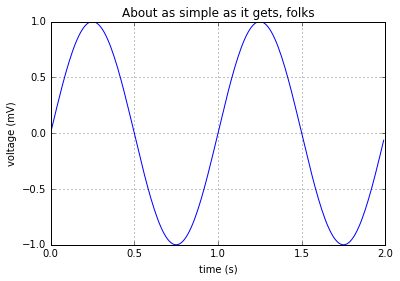

In [2]:



t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()


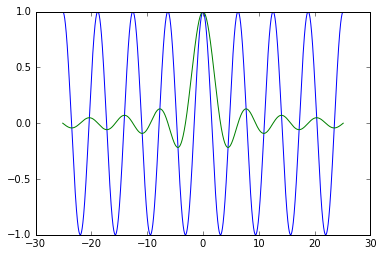

In [3]:
x=np.linspace(-8*np.pi, 8*np.pi, 4000)
y1=1/np.sin(x)
y2=np.cos(x)
y3=np.sin(x)/x

#plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
#plt.axis('equal')
plt.show()

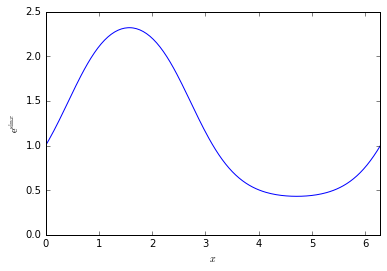

In [4]:
# Generate data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.exp(np.sin(np.sin(x)))

# Make plot
plt.plot(x, y)
plt.xlim((0, 2 * np.pi))
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathrm{e}^{\sin{x}}$')

In [5]:
import scipy.integrate

In [6]:
def lorenz_attractor(r, t, p):
    """
    Compute the right hand side of system of ODEs for Lorenz attractor.
    
    Parameters
    ----------
    r : array_like, shape (3,)
        (x, y, z) position of trajectory.
    t : dummy_argument
        Dummy argument, necessary to pass function into 
        scipy.integrate.odeint
    p : array_like, shape (3,)
        Parameters (s, k, b) for the attractor.
        
    Returns
    -------
    output : ndarray, shape (3,)
        Time derivatives of Lorenz attractor.
        
    Notes
    -----
    .. Returns the right hand side of the system of ODEs describing
       the Lorenz attractor.
        x' = s * (y - x)
        y' = x * (k - z) - y
        z' = x * y - b * z
    """
    # Unpack variables and parameters
    x, y, z = r
    s, p, b = p
    
    return np.array([s * (y - x), 
                     x * (p - z) - y, 
                     x * y - b * z])

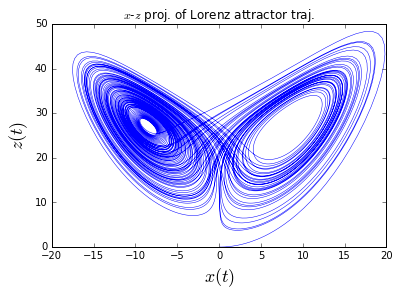

In [7]:
# Parameters to use
p = np.array([10.0, 28.0, 8.0 / 3.0])

# Initial condition
r0 = np.array([0.1, 0.0, 0.0])

# Time points to sample
t = np.linspace(0.0, 80.0, 10000)

# Use scipy.integrate.odeint to integrate Lorentz attractor
r = scipy.integrate.odeint(lorenz_attractor, r0, t, args=(p,))

# Unpack results into x, y, z.
x, y, z = r.transpose()

# Plot the result
plt.plot(x, z, '-', linewidth=0.5)
plt.xlabel(r'$x(t)$', fontsize=18)
plt.ylabel(r'$z(t)$', fontsize=18)
plt.title(r'$x$-$z$ proj. of Lorenz attractor traj.')

In [8]:
for i in range(1,10,2):
    print(i)

1
3
5
7
9


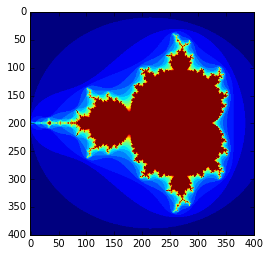

In [9]:
from numpy import *
import pylab

def mandelbrot( h,w, maxit=20 ):
        '''Returns an image of the Mandelbrot fractal of size (h,w).
        '''
        y,x = ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
        c = x+y*1j
        z = c
        divtime = maxit + zeros(z.shape, dtype=int)

        for i in range(maxit):
                z  = z**2 + c
                diverge = z*conj(z) > 2**2            # who is diverging
                div_now = diverge & (divtime==maxit)  # who is diverging now
                divtime[div_now] = i                  # note when
                z[diverge] = 2                        # avoid diverging too much
        
        return divtime
        
pylab.imshow(mandelbrot(400,400))
pylab.show()